### Explanation of the Code

#### **Objective**
This code demonstrates how to build and train an Artificial Neural Network (ANN) for a **regression problem** using the **Concrete dataset**. The goal is to predict the **compressive strength of concrete** based on its ingredients and properties.

---

### **Dataset Description**
The **Concrete dataset** contains information about the composition of concrete and its corresponding compressive strength. Each row represents a sample of concrete, and the columns include:
1. **Features (Inputs)**:
   - Cement
   - Blast Furnace Slag
   - Fly Ash
   - Water
   - Superplasticizer
   - Coarse Aggregate
   - Fine Aggregate
   - Age (in days)
2. **Target (Output)**:
   - Compressive strength of the concrete (in MPa).


In [1]:
# ! pip install scikeras
# scikeras is a standalone package that replaces the older keras.wrappers.scikit_learn. It provides a better interface for using Keras models within scikit-learn workflows.

In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

from scikeras.wrappers import KerasRegressor

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


2025-04-17 14:28:40.713120: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/sumitsontakke/Documents/Dev/PES/mlenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
concrete_df = pd.read_csv("concrete.csv")
concrete_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [4]:
concrete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
X = concrete_df.drop("strength", axis=1)
y = concrete_df["strength"]

#### Data Preprocessing : Scaling

🧠 Why MinMaxScaler?
Because it brings all feature values to a similar scale (typically [0, 1]), which is important for gradient descent in neural networks. It avoids domination by features with large values. This ensures that all features contribute equally to the model's training.

🧠 Why ColumnTransformer?
It makes it easy to apply preprocessing steps only to specific columns, and it's a clean interface when combining with pipelines.

In [6]:
# Define feature columns
feature_columns = X.columns.tolist()

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('minmax', MinMaxScaler(), feature_columns)
])


In [7]:
# Fit the preprocessor and transform the features
X_transformed = preprocessor.fit_transform(X)

# Convert the result to a DataFrame for better readability
X_transformed_df = pd.DataFrame(X_transformed, columns=feature_columns)

# Show the first few rows
X_transformed_df.head()


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,0.089726,0.589872,0.000000,0.652556,0.000000,0.496512,0.387607,0.074176
1,0.152740,0.117418,0.621189,0.291534,0.335404,0.813372,0.507275,0.035714
2,0.337900,0.000000,0.478261,0.523962,0.170807,0.453198,0.670346,0.074176
3,0.374429,0.317195,0.000000,0.848243,0.000000,0.380814,0.190667,0.074176
4,0.120548,0.510295,0.000000,0.571086,0.282609,0.716279,0.257652,0.074176


In [8]:
# # Combine original and transformed features for comparison
# comparison_df = pd.concat([X.reset_index(drop=True), X_transformed_df.add_suffix('_scaled')], axis=1)

# # Show first few rows
# comparison_df.head()


In [9]:
# # Access the MinMaxScaler from the ColumnTransformer
# scaler = preprocessor.named_transformers_['minmax']

# # Perform inverse transformation
# X_original = scaler.inverse_transform(X_transformed)

# # Convert the result back to a DataFrame for better readability
# X_original_df = pd.DataFrame(X_original, columns=feature_columns)

# # Display the first few rows
# X_original_df.head()

#### ANN Model Buid

In [10]:
X.shape

(1030, 8)

In [ ]:
# Define the build_model function with explicit optimizer and loss function
def build_model():
    model = Sequential()
    model.add(Dense(64, input_dim=8, activation='relu'))  # Assuming input_dim is 8
    model.add(Dense(1))  # Output layer for regression
    model.compile(optimizer='adam', loss='mean_squared_error')  # Explicit optimizer and loss
    return model

# Use the KerasRegressor from scikeras
model = KerasRegressor(model=build_model, epochs=100, batch_size=32, verbose=1)

# Define the pipeline with scaling and the model
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),  # Scaling input features
    ('model', model)  # Use the KerasRegressor
])

# Fit the model with training data
pipeline

"""
The model is compiled with:
Loss Function: Mean Squared Error (MSE) to minimize the difference between predicted and actual values.
Optimizer: Adam optimizer for efficient training. (General purpose and fast convergence)
Metrics: Easier to interpret in real-world applications, Mean Absolute Error (MAE) is used to evaluate the model's performance.
"""

"\nThe model is compiled with:\nLoss Function: Mean Squared Error (MSE) to minimize the difference between predicted and actual values.\nOptimizer: Adam optimizer for efficient training. (General purpose and fast convergence)\nMetrics: Easier to interpret in real-world applications, Mean Absolute Error (MAE) is used to evaluate the model's performance.\n"

🧠 Why use a function? - 
KerasRegressor requires a function that returns a compiled model so it can call it internally during fitting.

🧠 Why no activation in the last layer?  - 
Because this is a regression task, and we want to predict a continuous value.

Imagine your data matrix 
𝑋
X (with shape 
(
1030
,
8
)
(1030,8)):

Each row of 
𝑋
X is a sample with 8 features.

Each of the 64 neurons receives all 8 features and processes them individually.

After the first layer, you'll have 64 outputs per sample, resulting in a new data matrix of shape 
(
1030
,
64
)
(1030,64) that represents the transformed features after applying weights and activation functions.

#### Data split into train and test & Run the pipeline

In [ ]:
# Split data into train and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline (scaling + model training) on the training set
pipeline.fit(X_train, y_train)


Epoch 1/100


/Users/sumitsontakke/Documents/Dev/PES/mlenv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1549.2280   
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1477.9436 
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1513.4119 
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1360.0336 
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1225.8112 
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1194.7389 
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1055.1481 
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 862.5538 
Epoch 9/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 753.1035 
Epoch 10/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 647.6545 
Epoch 11/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 506.2560 
Epoch 12/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 485.4010 
Epoch 13/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 412.0452 
Epoch 14/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 312.8830 
Epoch 15/100
26/26 ━━━━━━━━━━━━━

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model',
                 KerasRegressor(batch_size=32, epochs=100, model=<function build_model at 0x10c997820>))])

In [14]:
# Evaluate model performance on the test set
test_mae = pipeline.score(X_test, y_test)

# Since score returns negative MSE by default, we negate it
print(f"Test MAE: {-test_mae:.2f} MPa")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Test MAE: -0.64 MPa


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

# Get predictions
y_pred = pipeline.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print(f"R-squared (R²): {r2:.3f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
R-squared (R²): 0.637


In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.3f} MPa")
print(f"RMSE: {rmse:.3f} MPa")
print(f"R²: {r2:.3f}")


MAE: 7.928 MPa
RMSE: 10.189 MPa
R²: 0.637


| Metric | Value | Interpretation |
| --- | --- | --- |
| MAE | 7.93 MPa | On average, predictions are off by ~7.93 MPa
RMSE | 10.19 MPa | Penalizes larger errors more than MAE
R² | 0.637 | About 63.7% of the variance in compressive strength is explained by the model

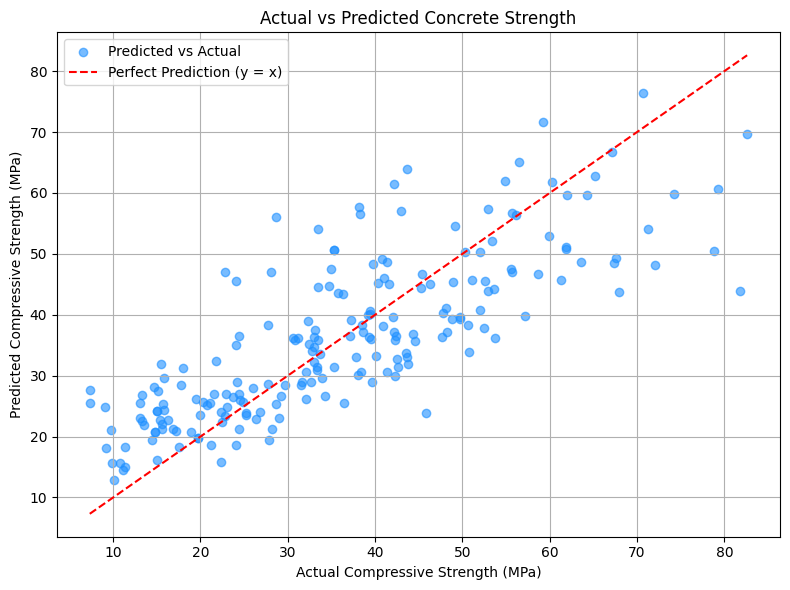

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Plot actual vs predicted
plt.scatter(y_test, y_pred, color='dodgerblue', label='Predicted vs Actual', alpha=0.6)

# Add perfect prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', label='Perfect Prediction (y = x)')

# Add labels, title, legend
plt.xlabel('Actual Compressive Strength (MPa)')
plt.ylabel('Predicted Compressive Strength (MPa)')
plt.title('Actual vs Predicted Concrete Strength')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### Using GridSearchCV to find best parameters

In [14]:
from sklearn.model_selection import GridSearchCV

# Define model builder function with flexible parameters
def build_model(n_neurons=64, optimizer='adam'):
    model = Sequential()
    model.add(Dense(n_neurons, input_dim=8, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

model = KerasRegressor(model=build_model, epochs=100, batch_size=32, verbose=0)

# Define the pipeline with scaling and the model
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),  # Scaling input features
    ('model', model)  # Use the KerasRegressor
])

# Split data into train and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline (scaling + model training) on the training set
# pipeline.fit(X_train, y_train)

# Define the parameter grid for GridSearchCV
param_grid = {
    'model__model__n_neurons': [32, 64, 128],         # for model-building function
    'model__model__optimizer': ['adam', 'rmsprop', 'sgd'],
    'model__epochs': [50, 100],                       # for KerasRegressor
    'model__batch_size': [16, 32]
}

grid = GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_mean_absolute_error')
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)


/Users/sumitsontakke/Documents/Dev/PES/mlenv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/sumitsontakke/Documents/Dev/PES/mlenv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/sumitsontakke/Documents/Dev/PES/mlenv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in

Best Params: {'model__batch_size': 16, 'model__epochs': 100, 'model__model__n_neurons': 64, 'model__model__optimizer': 'sgd'}


Best Params: {'model__batch_size': 16, 'model__epochs': 100, 'model__model__n_neurons': 64, 'model__model__optimizer': 'sgd'}

In [16]:

# Define the build_model function with explicit optimizer and loss function
def build_model():
    model = Sequential()
    model.add(Dense(64, input_dim=8, activation='relu'))  # Assuming input_dim is 8
    model.add(Dense(1))  # Output layer for regression
    model.compile(optimizer='sgd', loss='mean_squared_error')  # Explicit optimizer and loss
    return model

# Use the KerasRegressor from scikeras
model = KerasRegressor(model=build_model, epochs=100, batch_size=16, verbose=0)

# Define the pipeline with scaling and the model
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),  # Scaling input features
    ('model', model)  # Use the KerasRegressor
])

# Split data into train and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Fit the model with training data
best_model = pipeline.fit(X_train, y_train)

# Evaluate model performance on the test set
test_mae = best_model.score(X_test, y_test)
# Since score returns negative MSE by default, we negate it
print(f"Test MAE: {-test_mae:.2f} MPa")



/Users/sumitsontakke/Documents/Dev/PES/mlenv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test MAE: -0.69 MPa


In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

# Get predictions
y_pred = pipeline.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print(f"R-squared (R²): {r2:.3f}")

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.3f} MPa")
print(f"RMSE: {rmse:.3f} MPa")
print(f"R²: {r2:.3f}")

R-squared (R²): 0.690
MAE: 7.356 MPa
RMSE: 9.412 MPa
R²: 0.690


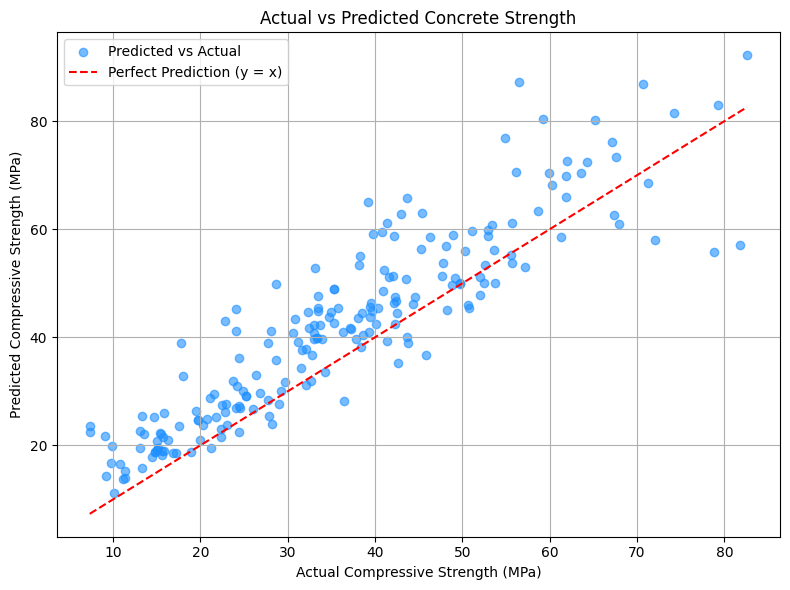

In [19]:
plt.figure(figsize=(8, 6))

# Plot actual vs predicted
plt.scatter(y_test, y_pred, color='dodgerblue', label='Predicted vs Actual', alpha=0.6)

# Add perfect prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', label='Perfect Prediction (y = x)')

# Add labels, title, legend
plt.xlabel('Actual Compressive Strength (MPa)')
plt.ylabel('Predicted Compressive Strength (MPa)')
plt.title('Actual vs Predicted Concrete Strength')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()